# Análisis venta de juegos

La tienda online ice la cual vende video juegos alrededor del mundo y tiene a su disposicion la informacion de la ventas que se han realizado desde 1980 hasta el 2016, no solo se cuenta con la venta de videosjuegos por region como tal (na,eu.jp y otros) si no que tambien cuentan con las plataformas en que salieron los juegos su genero, la clasificacion de la Junta de clasificación de software de entretenimiento (edad recomendada para jugar) y las reseñas de estos tanto de prensa especializada como de usuarios normales.

Se nos encargo encontrar tendencias o patrones a la hora de comprar juegos si existen preferencias por alguna platforma, si se tiene preferencia por un genero es especial si la reseñas afectan las compras y si estos difieren de region en region. Todo esto para enfocarse en los juegos que seran mas rentables para el año 2017. 

## Preparación de la información general

In [1]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.columns = df_games.columns.str.lower()
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


-El dataframe cuenta con 16715 entradas y con 11 columnas

-Se puede apreciar tipos de datos mal asignados  como year_of_release como float y user_score como object

-No todas la columnas cuentan con todos lo datos 

-Cambiar posteriormente las siglas tbd en user_score para solo dejar solo un tipo de dato en la columna

-Los datos ausentes pueden deberse al año en que se lanzaron los juegos ya que hay juegos de 1980 por lo que pueden no haber resivido alguna reseña o evaluacion por las entendades pertinentes o porque el juego o mas bien su desarrolladora no preciso toda a informacion de este. 

# Preparar los datos

## Tratar valores nulos

In [5]:
print(df_games.isna().sum())


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


-la mayor cantidad de valores nulos los poseen las columnas critic_score, user_score y rating

-Las columnas name y genre poseen el minimo 

-La columna year_of_release cuenta con datos nulos pero no tan significativos como los mencionados primero

### columna nombre

In [6]:
print(df_games[df_games['name'].isna()])
print(df_games[df_games['genre'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [7]:
df_games['name'] = df_games['name'].fillna('ngi')
print(df_games[df_games['name'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [8]:
df_games['name'] = df_games['name'].str.lower()
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                wii sports      Wii           2006.0        Sports     41.36   
1         super mario bros.      NES           1985.0      Platform     29.08   
2            mario kart wii      Wii           2008.0        Racing     15.68   
3         wii sports resort      Wii           2009.0        Sports     15.61   
4  pokemon red/pokemon blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


-Existian 2 nombre de juegos nulos pero estos no se pueden eleminar ya que cuentan con ventas por lo cual los cambie por ngi (no game information)

-Deje los nombres en minusculas para luego realizar una busqueda de duplicados mejor

### columna genre

In [9]:
print(df_games[df_games['genre'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    ngi      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  ngi      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [10]:
print(df_games['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [11]:
df_games['genre'] = df_games['genre'].str.lower()
df_games['genre'] = df_games['genre'].fillna('unassigned-genre')
print(df_games[df_games['genre'].isna()])
print(df_games['genre'].unique())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy'
 'unassigned-genre']


-Se puede apreciar que los 2 juegos que no tenian un genero eran los mismos que no contaban con un nombre

-No se elimanor debido a estos juegos presentan ventas

-se cambio estos a generos a unnasigned-genre 

-Se convertio todos los nombres de de los generos a minusculas para tener mas limpios los datos

### columna year of release

In [12]:
print(df_games['year_of_release'].isna().sum())
print(df_games[df_games['year_of_release'].isna()])

269
                                    name platform  year_of_release  \
183                      madden nfl 2004      PS2              NaN   
377                     fifa soccer 2004      PS2              NaN   
456           lego batman: the videogame      Wii              NaN   
475           wwe smackdown vs. raw 2006      PS2              NaN   
609                       space invaders     2600              NaN   
...                                  ...      ...              ...   
16373  pdc world championship darts 2008      PSP              NaN   
16405                      freaky flyers       GC              NaN   
16448                          inversion       PC              NaN   
16458        hakuouki: shinsengumi kitan      PS3              NaN   
16522                       virtua quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          sports      4.26      0.26      0.01         0.71          94.

In [13]:
print(df_games['year_of_release'].mean().round() )
print(df_games['year_of_release'].median().round() )

2006.0
2007.0


In [14]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(2007)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
print(df_games['year_of_release'].isna().sum())
print(df_games[df_games['year_of_release'].isna()])


0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [15]:
print(df_games.head())
df_games.info()

                       name platform  year_of_release         genre  na_sales  \
0                wii sports      Wii             2006        sports     41.36   
1         super mario bros.      NES             1985      platform     29.08   
2            mario kart wii      Wii             2008        racing     15.68   
3         wii sports resort      Wii             2009        sports     15.61   
4  pokemon red/pokemon blue       GB             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

-Los datos nulos de la columna year of release se cambiaron por la mediana de los datos 

-El cambio anterior se realizo para comvertir el tipo de dato a int ya que estaba en float y esto no tiene sentido ya que los años son solo numeros enteros

### columna critic score

In [16]:
print(df_games['critic_score'].isna().sum())


8578


In [17]:
print(df_games['critic_score'].unique())
print(df_games['critic_score'].min())
print(df_games['critic_score'].max())
print(df_games['critic_score'].mean().round())
print(df_games['critic_score'].median())


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
13.0
98.0
69.0
71.0


In [18]:
df_games['critic_score'] = df_games['critic_score'].fillna(71)
df_games['critic_score'] = df_games['critic_score'].astype(int)

In [19]:
print(df_games['critic_score'].isna().sum())
print(df_games['critic_score'].unique())

0
[76 71 82 80 89 58 87 91 61 97 95 77 88 83 94 93 85 86 98 96 90 84 73 74
 78 92 72 68 62 49 67 81 66 56 79 70 59 64 75 60 63 69 50 25 42 44 55 48
 57 29 47 65 54 20 53 37 38 33 52 30 32 43 45 51 40 46 39 34 35 41 36 28
 31 27 26 19 23 24 21 17 22 13]


-Por lo que se puede observar el critic score es un valor del 1 al 100

-Los datos nulos se reemplazoron por la mediana de los datos 

-Se convertio el tipo de dato de float a int ya que se puede ver la puntuacion solo se realiza en numeros enteros

### columna user score

In [20]:
print(df_games['user_score'].isna().sum())

6701


In [21]:
print(df_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [22]:
df_games['user_score'] = df_games['user_score'].replace('tbd',0.0)
df_games['user_score'] = df_games['user_score'].astype(float)

print(df_games['user_score'].mean())
print(df_games['user_score'].median())

5.40034951068504
6.9


In [23]:
df_games['user_score'] = df_games['user_score'].fillna(6.9)
print(df_games['user_score'].isna().sum())
print(df_games['user_score'].unique())

0
[8.  6.9 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 0.
 8.8 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3 0.2
 0.6 1.4 0.9 1.  9.7]


-Se puede apreciar que el user score va de 1.0 hasta el 10.0

-Los datos con tbd se les asigno el 0.0 ya que todovia no se reciben un score

-Al cambiar la designacion tbd se convertio el tipo de dato de object a float 

-Se decidio rellenar los datos nulos con la mediana de los datos

### columna rating

In [24]:
print(df_games['rating'].isna().sum())

6766


In [25]:
print(df_games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [26]:
df_games['rating'] = df_games['rating'].fillna('RNA')

print(df_games['rating'].isna().sum())
print(df_games['rating'].unique())

0
['E' 'RNA' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


-Los datos nulos se rellenaron con la sigla RNA (rating no asignado ) 

## Duplicados

In [27]:
print(df_games.duplicated().sum())

0


### columna name

In [28]:
print(df_games['name'].duplicated().sum())

5155


In [29]:
print(df_games[df_games['name'].duplicated()])

                                                   name platform  \
23                                   grand theft auto v     X360   
35                           call of duty: black ops ii     X360   
37                       call of duty: modern warfare 3      PS3   
41                              call of duty: black ops      PS3   
42                                   grand theft auto v      PS4   
...                                                 ...      ...   
16706                     men in black ii: alien escape       GC   
16709  score international baja 1000: the official game      PS2   
16710                     samurai warriors: sanada maru      PS3   
16713                                  spirits & spells      GBA   
16714                               winning post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
23                2013      action      9.66      5.14      0.06         1.41   
35                201

In [30]:
print(df_games[df_games['name'] == 'call of duty: black ops ii'])

                            name platform  year_of_release    genre  na_sales  \
34    call of duty: black ops ii      PS3             2012  shooter      4.99   
35    call of duty: black ops ii     X360             2012  shooter      8.25   
1227  call of duty: black ops ii       PC             2012  shooter      0.64   
4706  call of duty: black ops ii     WiiU             2012  shooter      0.20   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  
34        5.73      0.65         2.42            83         5.3      M  
35        4.24      0.07         1.12            83         4.8      M  
1227      0.69      0.00         0.19            74         4.2      M  
4706      0.18      0.00         0.03            81         6.9      M  


-Como se puede apreciar no se encuentran filas totalmente duplicadas 
-En este caso en concreto no tiene mucho peso si se encuentran duplicados en los nombres de los juegos ya que en el dataset como se puede ver cuenta con la salida de un mismo juego para diferentes plataformas que algunos casos puede ser en un mismo año o en otro ya que la salida de un juego en una plataforma esta totalmente en desicion de los dueños de esta y se realiza en forma de acuerdo con la empresa que publica el juego

## Calculo de ventas totales

In [31]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games.head())


                       name platform  year_of_release         genre  na_sales  \
0                wii sports      Wii             2006        sports     41.36   
1         super mario bros.      NES             1985      platform     29.08   
2            mario kart wii      Wii             2008        racing     15.68   
3         wii sports resort      Wii             2009        sports     15.61   
4  pokemon red/pokemon blue       GB             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77            71         6.9    RNA   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00            71         6.9    RNA   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

# Analisis de datos

## Cantidad de juegos lanzados por año

In [32]:
pivot_juegos = df_games.pivot_table(index='year_of_release',values='name', aggfunc='count').reset_index() 

print(pivot_juegos)

    year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    62
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1466
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   502


In [33]:
cantidad_juegos_plataforma = df_games.pivot_table(index='platform',values='name',aggfunc='count')

print(cantidad_juegos_plataforma)

          name
platform      
2600       133
3DO          3
3DS        520
DC          52
DS        2151
GB          98
GBA        822
GC         556
GEN         29
GG           1
N64        319
NES         98
NG          12
PC         974
PCFX         1
PS        1197
PS2       2161
PS3       1331
PS4        392
PSP       1209
PSV        430
SAT        173
SCD          6
SNES       239
TG16         2
WS           6
Wii       1320
WiiU       147
X360      1262
XB         824
XOne       247


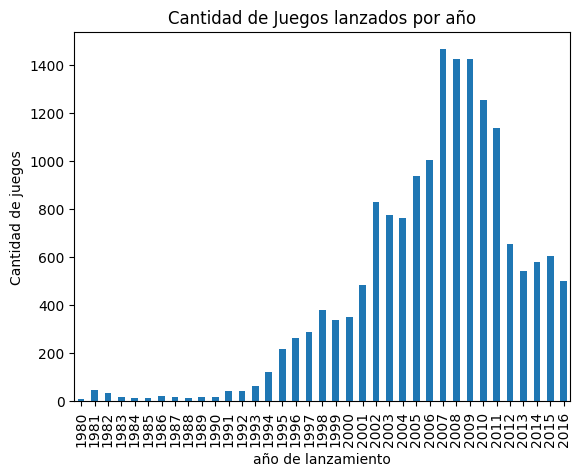

In [33]:
pivot_juegos.plot(kind='bar',x='year_of_release',y='name',legend=False,xlabel='año de lanzamiento',ylabel='Cantidad de juegos',title='Cantidad de Juegos lanzados por año')
plt.show()

-Los inicios del registro que es de 1980 se puede ver que existian pocos lanzamientos por año

-Apartir de los 2000 comenzaron a salir mas juegos por año posiblemente debido al surgimiento de nuevas plataformas

## ventas por plataforma

se tomara en encuenta los datos a partir del año 2012 para los siguientes analisis para poder realizar una proyeccion mas acertada

In [34]:
df_games_relevantes = df_games[df_games['year_of_release'] >= 2012] 

print(df_games_relevantes)

                                name platform  year_of_release         genre  \
16                grand theft auto v      PS3             2013        action   
23                grand theft auto v     X360             2013        action   
31         call of duty: black ops 3      PS4             2015       shooter   
33               pokemon x/pokemon y      3DS             2013  role-playing   
34        call of duty: black ops ii      PS3             2012       shooter   
...                              ...      ...              ...           ...   
16703               strawberry nauts      PSV             2016     adventure   
16707               aiyoku no eustia      PSV             2014          misc   
16710  samurai warriors: sanada maru      PS3             2016        action   
16712        haitaka no psychedelica      PSV             2016     adventure   
16714            winning post 8 2016      PSV             2016    simulation   

       na_sales  eu_sales  jp_sales  ot

In [35]:
pivot_plataformas = pd.pivot_table(df_games_relevantes,index='platform',values='total_sales', aggfunc={'total_sales':'sum'})

#pivot_plataformas.reset_index(inplace=True)
print(pivot_plataformas)
#print(df_games['platform'].value_counts())

          total_sales
platform             
3DS            194.61
DS              12.55
PC              62.65
PS3            288.79
PS4            314.14
PSP             11.19
PSV             49.18
Wii             35.37
WiiU            82.19
X360           236.54
XOne           159.32


In [36]:
filtro_plataformas = pivot_plataformas.sort_values(by='total_sales',ascending=False)
mejores_plataformas = filtro_plataformas.head()
print(mejores_plataformas)

          total_sales
platform             
PS4            314.14
PS3            288.79
X360           236.54
3DS            194.61
XOne           159.32


In [37]:
pivot_anno_juegos = df_games_relevantes.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)

print(pivot_anno_juegos)

platform           3DS     DS     PC     PS3     PS4   PSP    PSV    Wii  \
year_of_release                                                            
2012             51.36  11.01  23.22  107.36    0.00  7.69  16.19  21.71   
2013             56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014             43.76   0.00  13.28   47.76  100.00  0.24  11.90   3.75   
2015             27.78   0.00   8.52   16.82  118.90  0.12   6.25   1.14   
2016             15.14   0.00   5.25    3.60   69.25  0.00   4.25   0.18   

platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74   0.00  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15  


['PS4', 'PS3', 'X360', '3DS', 'XOne']


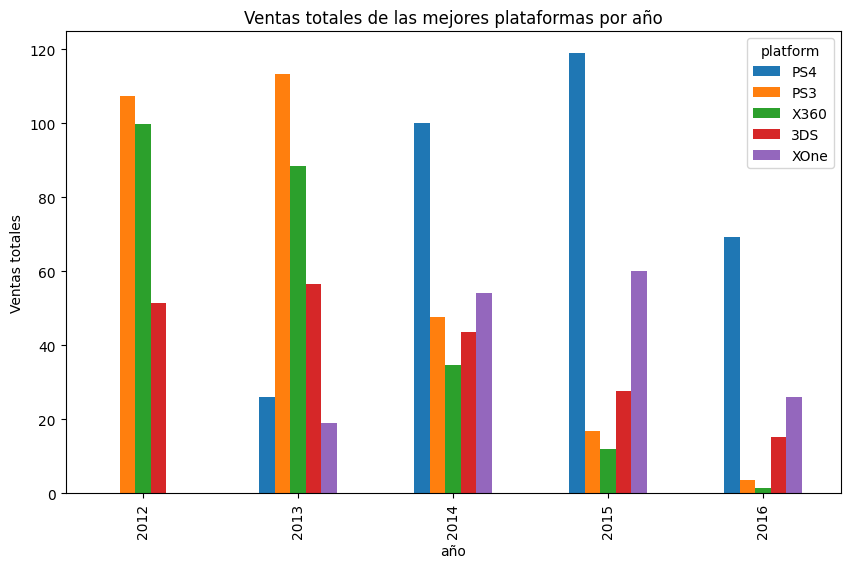

In [41]:
top = mejores_plataformas.index.tolist()
print(top)
pivot_anno_juegos[['PS4','PS3','X360','3DS','XOne']].plot(kind='bar',figsize=(10,6))
plt.title('Ventas totales de las mejores plataformas por año')
plt.xlabel("año")
plt.ylabel('Ventas totales')
plt.show()

-Las plataformas como mejores ventas fueron la PS4,PS3,X360,3DS,XOne

-Se puede apreciar que las plataformas de playstation son las que poseen mayores ventas para los años vistos

-Las plataformas preferentes son las de Sony ya que posee tanto la PS3 y la PS4 en la lista, le sigue Microsoft con la Xbox 360 y la Xbox One y por ultimo nintendo con la 3DS

In [45]:
#primero se realizo un filtro con los juegos que tuvieron ventas el año 2016
anno_actual = df_games_relevantes['year_of_release'].max()

plataformas_no_olvidadas = df_games_relevantes[(df_games_relevantes['total_sales']>0) & (df_games_relevantes['year_of_release']==anno_actual)]
filtro_no_olvidadas = plataformas_no_olvidadas['platform'].unique()

print(filtro_no_olvidadas)
#el siguiente paso fue usar el filtro anteior para poder seleccionar las plataformas que no tuvieron ventas el año 2016
plataformas_olvidadas = df_games_relevantes[~(df_games_relevantes['platform'].isin(filtro_no_olvidadas)) ]

print(plataformas_olvidadas.groupby('platform')['year_of_release'].max())

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'PC' 'X360' 'PSV' 'Wii']
platform
DS     2013
PSP    2015
Name: year_of_release, dtype: int64


In [43]:
vida_plataformas = df_games_relevantes.groupby(by='platform')['year_of_release'].agg(['min','max']).reset_index()
vida_plataformas['vida'] = vida_plataformas['max'] -  vida_plataformas['min']
print(vida_plataformas.sort_values('min'))

   platform   min   max  vida
0       3DS  2012  2016     4
1        DS  2012  2013     1
2        PC  2012  2016     4
3       PS3  2012  2016     4
5       PSP  2012  2015     3
6       PSV  2012  2016     4
7       Wii  2012  2016     4
8      WiiU  2012  2016     4
9      X360  2012  2016     4
4       PS4  2013  2016     3
10     XOne  2013  2016     3


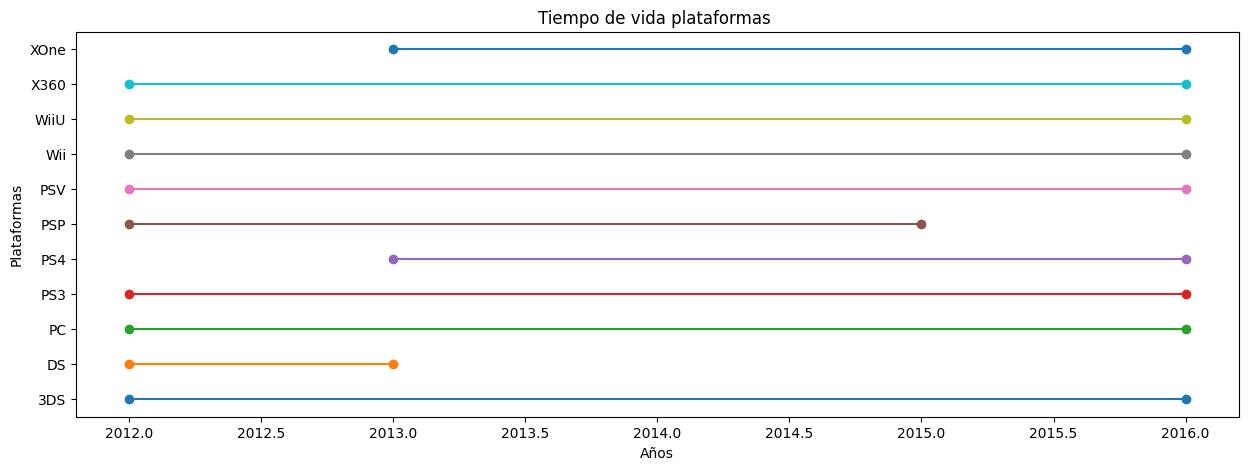

In [44]:
plt.figure(figsize=(15,5))
for idx, row in vida_plataformas.iterrows():
    plt.plot([row['min'],row['max']],[row['platform'],row['platform']],marker='o')

plt.title('Tiempo de vida plataformas ')    
plt.xlabel('Años')
plt.ylabel('Plataformas')
plt.show()

-En general la vida util dependera de que tan popular sea la plataforma por lo que se puede apreciar cuando es popular tiene una vida util de al menos 4 años

-Las plataformas que no tuvieron ventas el año 2016 fueron la PSP Y la DS

-Las plataformas posiblemente mas rentables por el periodo en que salieron y las compañias que generalmente las respaldan(Sony,nintendo,Microsoft) son WiiU, PS4 Y Xbox One

-Con respecto a lo anterior se debe considerar en este ambito en particular la plataforma PC ya que hace referencia al equipo computacional como tal por lo cual en el contexto de los videojuegos siempres sera relevante y rentable considerar esta opcion



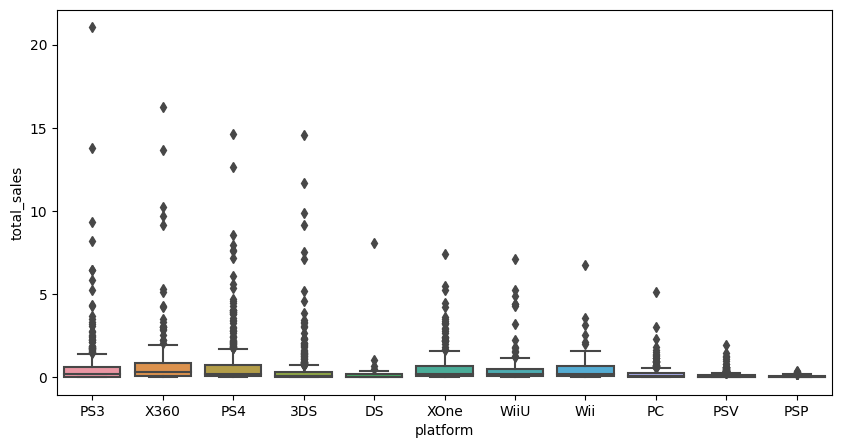

In [46]:

plt.figure(figsize=(10,5))
sns.boxplot(x='platform',y='total_sales',data=df_games_relevantes)

plt.show()

In [47]:
agg_mean={'na_sales':'mean','eu_sales':'mean','jp_sales':'mean','other_sales':'mean'}

df_games_relevantes_mean = df_games_relevantes.groupby('platform').agg(agg_mean)
print(df_games_relevantes_mean)

          na_sales  eu_sales  jp_sales  other_sales
platform                                           
3DS       0.139672  0.107677  0.221692     0.022399
DS        0.148065  0.113871  0.120000     0.022903
PC        0.076480  0.151040  0.000000     0.023080
PS3       0.209696  0.216755  0.071582     0.087748
PS4       0.277398  0.359923  0.040714     0.123342
PSP       0.000751  0.002428  0.060520     0.000983
PSV       0.026715  0.027640  0.051192     0.014112
Wii       0.323148  0.220741  0.062778     0.048333
WiiU      0.259184  0.170952  0.088503     0.040476
X360      0.479623  0.255205  0.005377     0.069863
XOne      0.377004  0.208866  0.001377     0.057773


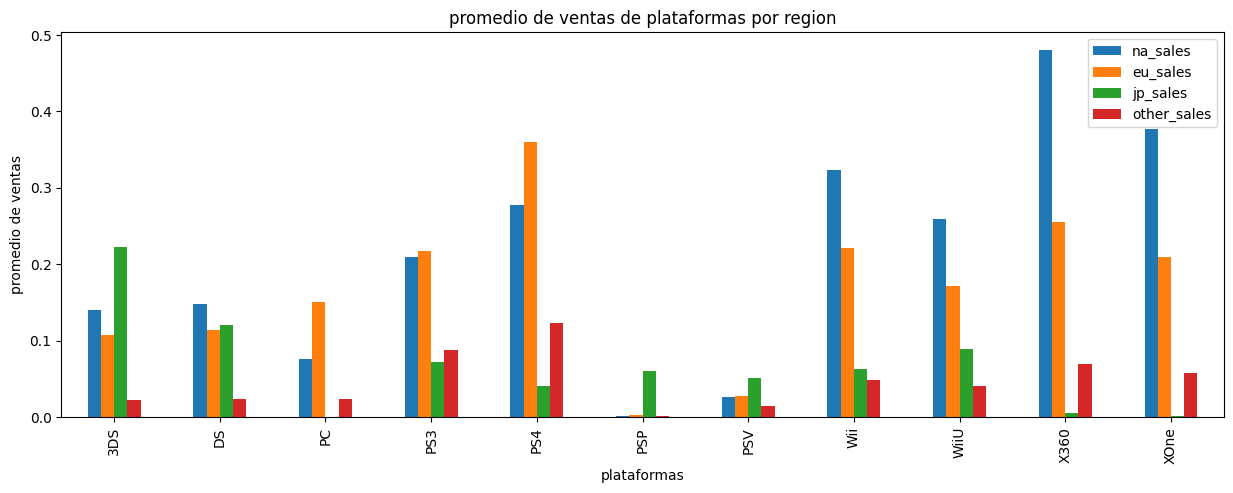

In [48]:

df_games_relevantes_mean.plot(kind='bar',figsize=(15,5),title='promedio de ventas de plataformas por region',xlabel='plataformas',ylabel='promedio de ventas')

plt.show()

-Como se puede ver en el grafico de caja la mayoria de plataformas tiene ventas similares , pero de igual forma muestran una gran cantidad de valores atipicos lo que es bueno ya que se concluye que se tienen ventas por sobre los cuartiles dados

-Como se puede apreciar en el grafico de promedio de ventas de plataformas por region en norte america y Europa se encuentran con una gran cantidad de ventas a diferencia de Japon

## Correlación entre reseñas y ventas

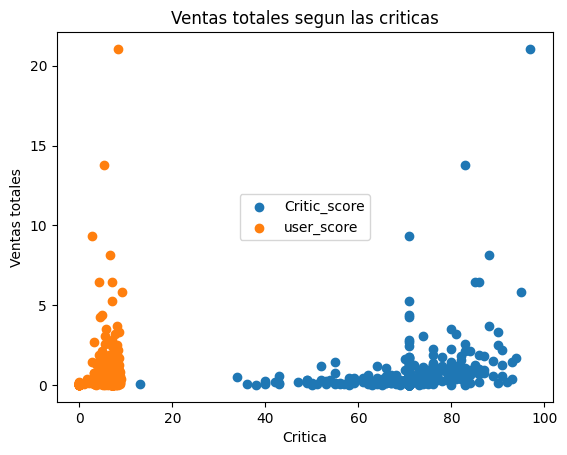

In [50]:
ps3_review = df_games_relevantes[df_games_relevantes['platform'] == 'PS3']

plt.scatter(ps3_review['critic_score'], ps3_review['total_sales'])
plt.scatter(ps3_review['user_score'], ps3_review['total_sales'])
plt.title('Ventas totales segun las criticas')
plt.xlabel('Critica')
plt.ylabel('Ventas totales')
plt.legend(['Critic_score','user_score'],loc='center')
plt.show()

In [52]:

correlaccion_critic_total_sales = df_games_relevantes['critic_score'].corr(df_games_relevantes['total_sales'])
print(f'La correlacion entre la critica de los de los medios especializados y las ventas es {correlaccion_critic_total_sales}')
correlaccion_user_critic_total_sales =df_games_relevantes['user_score'].corr(df_games_relevantes['total_sales'])
print(f'La correlacion entre la critica de los usuarios y las ventas es {correlaccion_user_critic_total_sales}')

La correlacion entre la critica de los de los medios especializados y las ventas es 0.2662607325220693
La correlacion entre la critica de los usuarios y las ventas es 0.046211257404721644


-Como se puede ver en el gráfico de dispersión las reseñas positivas si afectan las ventas pero se toma mas peso por las reseñas de los propios jugadores que por la critica especializada

-Lo planteado anteriormiento se puede evidenciar por la correlación que tiene las reseñas de los usuario con los ventas totales ya que hay una correlacion entre el user score y las ventas totales superior a la de critic score  

## Comparacion de juegos en otras plataformas

In [53]:
mejores_consolas= df_games_relevantes[df_games_relevantes['platform'].isin(top) ]


juegos_por_plataforma = mejores_consolas.pivot_table(index='name',columns='platform',values='total_sales',fill_value=0)

print(juegos_por_plataforma )

platform                                        3DS   PS3  PS4  X360  XOne
name                                                                      
 beyblade burst                                0.03  0.00  0.0  0.00  0.00
 fire emblem fates                             1.67  0.00  0.0  0.00  0.00
 frozen: olaf's quest                          0.59  0.00  0.0  0.00  0.00
 haikyu!! cross team match!                    0.04  0.00  0.0  0.00  0.00
 tales of xillia 2                             0.00  0.84  0.0  0.00  0.00
...                                             ...   ...  ...   ...   ...
zoo tycoon (2013)                              0.00  0.00  0.0  0.09  0.36
zumba fitness core                             0.00  0.00  0.0  0.05  0.00
zumba fitness rush                             0.00  0.00  0.0  0.18  0.00
zumba fitness: world party                     0.00  0.00  0.0  0.00  0.24
zyuden sentai kyoryuger: game de gaburincho!!  0.05  0.00  0.0  0.00  0.00

[1122 rows x 5 columns]


In [54]:
filtro_cantidad_plataformas_juego = mejores_consolas.groupby('name')['platform'].nunique()
filtro_juegos_mas_plataformas = filtro_cantidad_plataformas_juego[filtro_cantidad_plataformas_juego == 5]

df_grafico_juegos = mejores_consolas[mejores_consolas['name'].isin(filtro_juegos_mas_plataformas.index)]


juegos_por_plataforma2 = df_grafico_juegos.pivot_table(index=['name','genre'],columns='platform',values='total_sales',fill_value=0)
print(juegos_por_plataforma2)

platform                                              3DS   PS3   PS4  X360  \
name                                       genre                              
adventure time: finn & jake investigations action    0.09  0.08  0.10  0.09   
angry birds star wars                      strategy  0.33  0.29  0.22  0.28   
fifa 14                                    sports    0.23  6.46  3.01  4.22   
fifa 15                                    sports    0.46  4.28  6.08  2.92   
lego batman 3: beyond gotham               action    0.45  0.73  0.92  0.89   
lego jurassic world                        action    0.62  0.85  0.90  0.87   
lego marvel super heroes                   action    0.89  1.83  1.62  2.22   
lego marvel's avengers                     action    0.18  0.26  0.73  0.32   
lego star wars: the force awakens          action    0.13  0.17  0.71  0.12   
lego the hobbit                            action    0.24  0.46  0.60  0.45   
skylanders swap force                      platform 

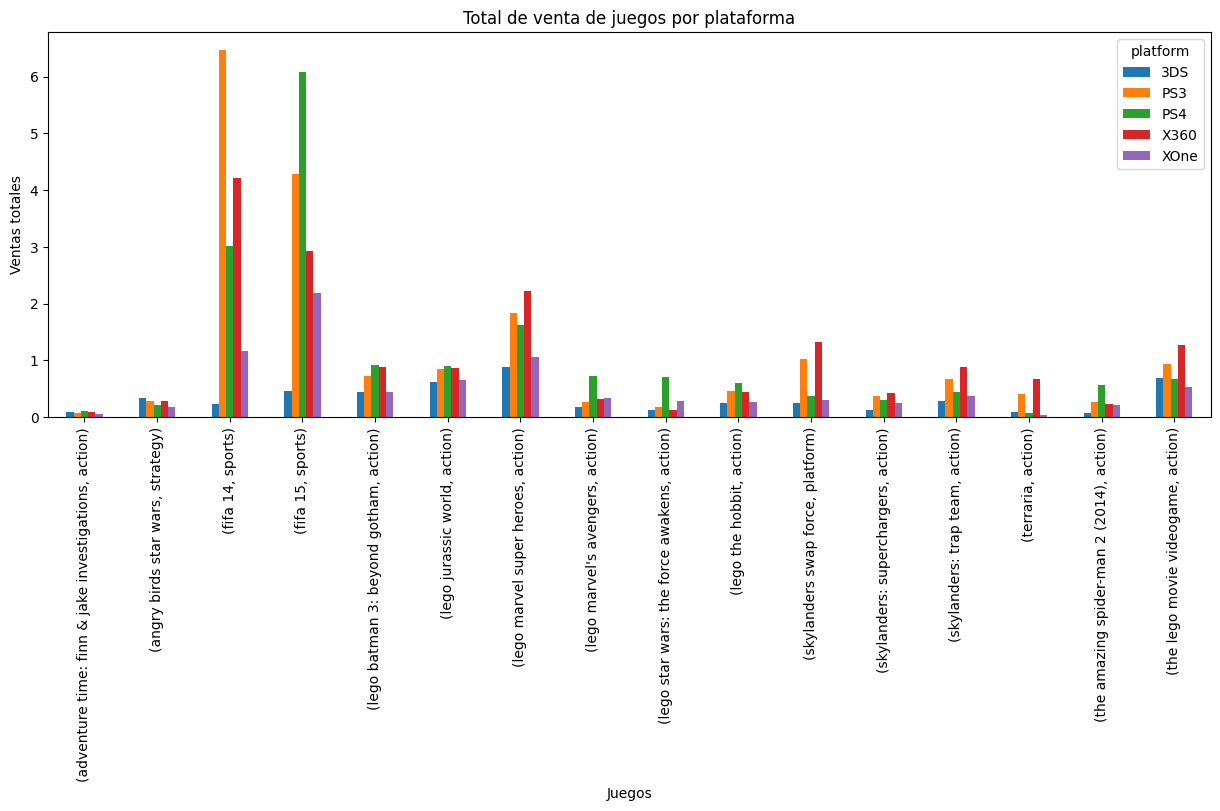

In [55]:
juegos_por_plataforma2.plot(kind='bar',figsize=(15,5),xlabel='Juegos', ylabel='Ventas totales',title='Total de venta de juegos por plataforma')
plt.show()

-Se filtro y se realizo el analisis solo con juegos que estuvieran en las 5 plataformas mas populares

-Por lo general se suele preferir jugar en las plataformas PS3 y Xbox 360 por lo que se puede apreciar en el grafico hay que considerar el genero del juego ya que en este caso la 3DS es una consola portatil y puede preferir ciertos juegos para esta por ejemplo

## Juegos por genero

In [56]:
filtro_genero = mejores_consolas.pivot_table(index='genre',values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False)

print(filtro_genero)

              total_sales
genre                    
action             376.25
shooter            282.11
sports             167.81
role-playing       151.26
misc                48.78
racing              42.18
fighting            35.53
platform            34.13
simulation          25.16
adventure           22.68
strategy             4.79
puzzle               2.72


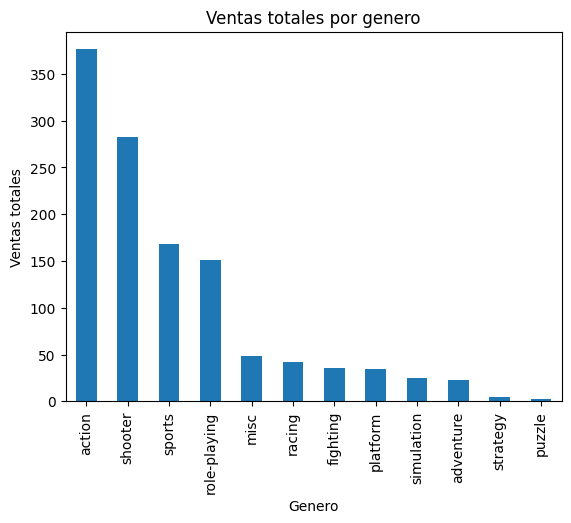

In [57]:
filtro_genero.plot(kind='bar',legend=False,xlabel='Genero',ylabel='Ventas totales',title='Ventas totales por genero')
plt.show()

-Se suele preferir juegos que requieren que el jugador realice muchas acciones con el control esto se ve reflejado ya que el genero mas vendido es el de accion y el menos preferido el de estrategia los cuales son mas complejos y contienen acciones automaticas por lo que el judador no interactua tanto con los controles  

## Perfiles

### Plataformas 

In [58]:
perfil_na = df_games_relevantes.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values('na_sales',ascending=False).head()
perfil_eu = df_games_relevantes.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values('eu_sales',ascending=False).head()
perfil_jp = df_games_relevantes.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values('jp_sales',ascending=False).head()
print(perfil_na)
print(perfil_eu)
print(perfil_jp)

          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31
          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64
          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


In [59]:
total_na_sales = perfil_na.sum()
total_eu_sales = perfil_eu.sum()
total_jp_sales = perfil_jp.sum()

perfil_na['cuota_mer'] = perfil_na/total_na_sales * 100
perfil_eu['cuota_mer'] = perfil_eu/total_eu_sales * 100
perfil_jp['cuota_mer'] = perfil_jp/total_jp_sales * 100
print(perfil_na)
print(perfil_eu)
print(perfil_jp)

          na_sales  cuota_mer
platform                     
X360        140.05  27.976428
PS4         108.74  21.721934
PS3         103.38  20.651219
XOne         93.12  18.601678
3DS          55.31  11.048742
          eu_sales  cuota_mer
platform                     
PS4         141.09  33.858891
PS3         106.86  25.644348
X360         74.52  17.883369
XOne         51.59  12.380610
3DS          42.64  10.232781
          jp_sales  cuota_mer
platform                     
3DS          87.79  50.719279
PS3          35.29  20.388237
PSV          21.04  12.155526
PS4          15.96   9.220637
WiiU         13.01   7.516321


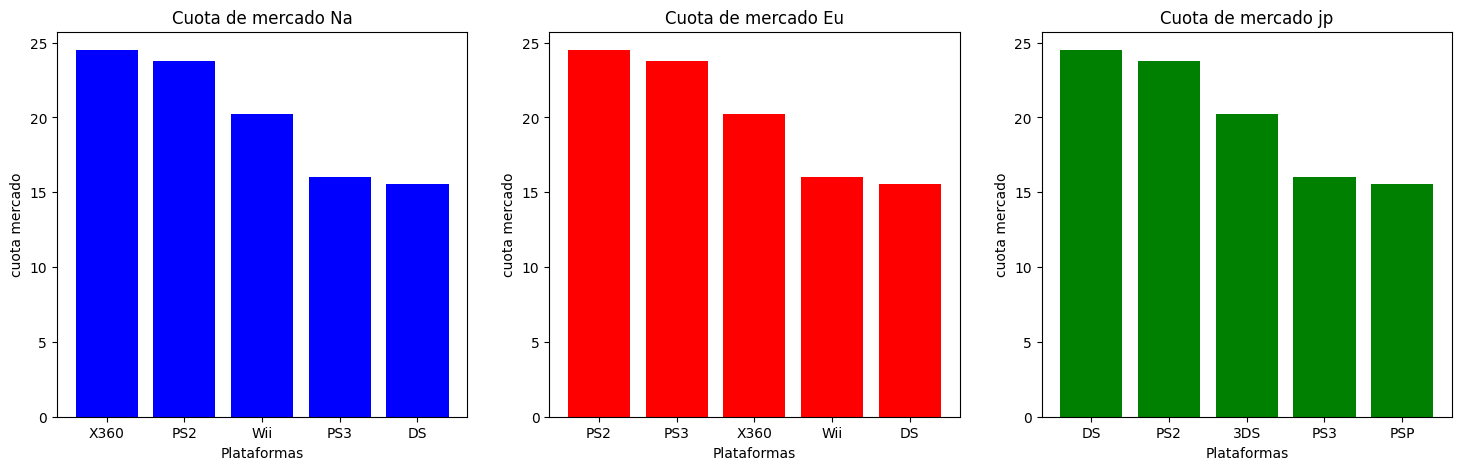

In [55]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

axes[0].bar(perfil_na.index,perfil_na['cuota_mer'],color='blue')
axes[0].set_title('Cuota de mercado Na')
axes[0].set_xlabel('Plataformas')
axes[0].set_ylabel('cuota mercado')

axes[1].bar(perfil_eu.index,perfil_na['cuota_mer'],color='red')
axes[1].set_title('Cuota de mercado Eu')
axes[1].set_xlabel('Plataformas')
axes[1].set_ylabel('cuota mercado')

axes[2].bar(perfil_jp.index,perfil_na['cuota_mer'],color='green')
axes[2].set_title('Cuota de mercado jp')
axes[2].set_xlabel('Plataformas')
axes[2].set_ylabel('cuota mercado')


plt.show()

-Por lo que se puede apreciar las regiones tiene sus preferencia en cuanto a las consolas

-En norte america tiene preferencia por Xbox 360 y PS2 mayormente, en europa por PS2 y PS3 y en japon por la DS y PS2


### Genero

In [60]:
perfil_na_genre = mejores_consolas.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values('na_sales',ascending=False).head()
perfil_eu_genre = mejores_consolas.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values('eu_sales',ascending=False).head()
perfil_jp_genre = mejores_consolas.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values('jp_sales',ascending=False).head()
print(perfil_na_genre)
print(perfil_eu_genre)
print(perfil_jp_genre)

              na_sales
genre                 
action          153.47
shooter         136.53
sports           77.65
role-playing     51.81
misc             22.86
              eu_sales
genre                 
action          136.51
shooter         102.87
sports           63.30
role-playing     38.04
racing           22.70
              jp_sales
genre                 
role-playing     49.49
action           40.95
simulation       10.23
shooter           7.58
fighting          7.41


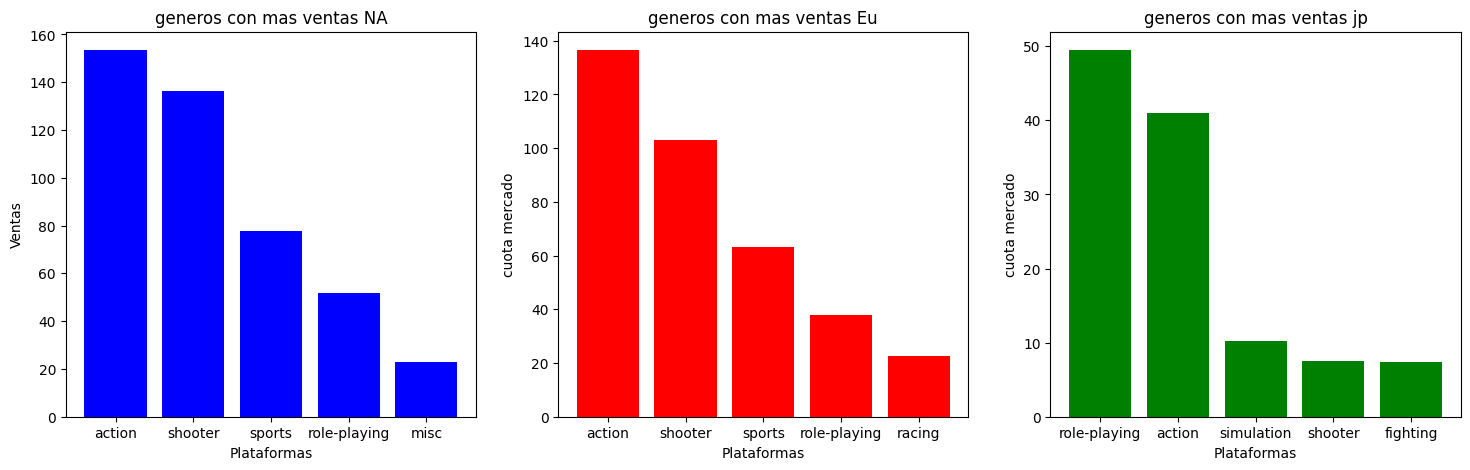

In [61]:
fig, axes1 = plt.subplots(1,3,figsize=(18,5))

axes1[0].bar(perfil_na_genre.index,perfil_na_genre['na_sales'],color='blue')
axes1[0].set_title('generos con mas ventas NA')
axes1[0].set_xlabel('Plataformas')
axes1[0].set_ylabel('Ventas')

axes1[1].bar(perfil_eu_genre.index,perfil_eu_genre['eu_sales'],color='red')
axes1[1].set_title('generos con mas ventas Eu')
axes1[1].set_xlabel('Plataformas')
axes1[1].set_ylabel('cuota mercado')

axes1[2].bar(perfil_jp_genre.index,perfil_jp_genre['jp_sales'],color='green')
axes1[2].set_title('generos con mas ventas jp')
axes1[2].set_xlabel('Plataformas')
axes1[2].set_ylabel('cuota mercado')


plt.show()

-El genero de accion es el preferido siendo el como mas ventas en las regiones de Norte America y Europa y el segundo en Japon

-las regiones de Norte America y Europa tiene preferencia por los mismo generos

-Japon tiene diferentes preferencias con respecto a los generos

### Rating

In [62]:
perfil_na_rating = df_games_relevantes.pivot_table(index='rating',values='na_sales', aggfunc='sum').reset_index()
perfil_eu_rating = df_games_relevantes.pivot_table(index='rating',values='eu_sales', aggfunc='sum').reset_index()
perfil_jp_rating = df_games_relevantes.pivot_table(index='rating',values='jp_sales', aggfunc='sum').reset_index()

print(perfil_na_rating)
print(perfil_eu_rating)
print(perfil_jp_rating)

  rating  na_sales
0      E    114.37
1   E10+     75.70
2      M    231.57
3    RNA    103.31
4      T     66.02
  rating  eu_sales
0      E    113.03
1   E10+     55.37
2      M    193.96
3    RNA     91.50
4      T     52.96
  rating  jp_sales
0      E     28.33
1   E10+      8.19
2      M     21.20
3    RNA    108.84
4      T     26.02


  rating  na_sales  eu_sales  jp_sales
0      E    114.37    113.03     28.33
1   E10+     75.70     55.37      8.19
2      M    231.57    193.96     21.20
3    RNA    103.31     91.50    108.84
4      T     66.02     52.96     26.02


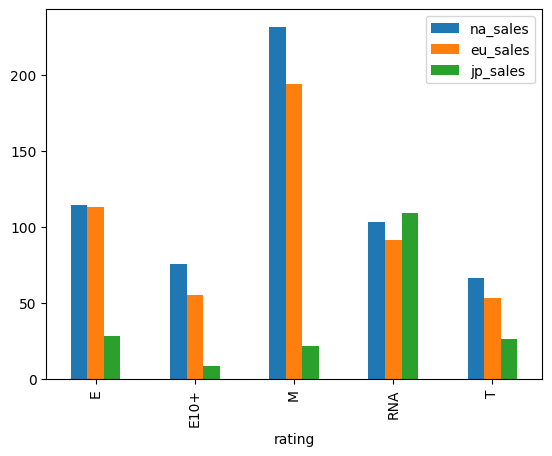

In [63]:
rating_merge = pd.merge(perfil_na_rating,perfil_eu_rating,on='rating')

finale_rating = pd.merge(rating_merge,perfil_jp_rating,on='rating')
print(finale_rating )

finale_rating.plot(kind='bar', x='rating')

plt.show()

-Las ventas segun el rating(edad recomendada) que tienen los juegos por region en general lo gana Norte America seguido de Europa y finalmente Japon

-Segun el grafico mostrado los juegos con rating M para todos son los juegos mas vendidos

-Tener en considerancion el rating agregado anteriormente RNA debido a que hay una cantidad de juegos a considerar que no han sido evaluados para estar en algunas de las categorias

# Hipótesis

## hipotesis 1

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales

Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes


In [64]:

critica_usuarios_xone = df_games_relevantes[df_games_relevantes['platform'] == 'XOne']['user_score']
critica_usuarios_pc = df_games_relevantes[df_games_relevantes['platform'] == 'PC']['user_score']
print(critica_usuarios_xone)
print(critica_usuarios_pc)

varianza = np.var(critica_usuarios_xone)
varianza2 = np.var(critica_usuarios_pc)
print(varianza)
print(varianza2)

99       6.9
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    6.9
16660    6.7
16672    0.0
Name: user_score, Length: 247, dtype: float64
192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16584    7.9
16617    6.9
16631    6.9
16678    6.9
16692    7.6
Name: user_score, Length: 250, dtype: float64
3.2796485764395413
3.12994304


In [65]:
alpha = 0.05
results_plataforma = st.ttest_ind(critica_usuarios_xone,critica_usuarios_pc)
print('valor p:', results_plataforma.pvalue)

if results_plataforma.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis nula')

valor p: 0.7101755651474378
no podemos rechazar la hipotesis nula


In [66]:
results_levene_plataforma = st.levene(critica_usuarios_xone,critica_usuarios_pc)
print(results_levene_plataforma.statistic)
print(results_levene_plataforma.pvalue)

if results_levene_plataforma.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis nula')

0.9816880230315098
0.3222664852658257
no podemos rechazar la hipotesis nula


-Utilizando la prueba correspondiente para comprobar si las medias estasdisticas son iguales se pudo comprobar que las reseñas de los usuarios de Xbox One y PC casi iguales

-Esto se sustento al hacer la prueba de levene que muestra si las varianzas son iguales y los  resultados tambien condujeron al rechazo el no poder rechazar H0

-Por lo visto los usuarios de estas plataformas tienen una opinion similar con respecto a los juegos, puede ser debido a que cuentan con los mismos juegos 

## hipotesis 2

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Hipotesis nula: Las califiaciones promedio de los usuarios para los generos de accion y deportes son iguales.

Hipotesis alternativa: Las calificaciones promedio de los usuarios para los generos de accion y deportes son diferentes

In [70]:
critica_usuarios_accion = df_games_relevantes[df_games_relevantes['genre'] == 'action']['user_score']
critica_usuarios_deportes = df_games_relevantes[df_games_relevantes['genre'] == 'sports']['user_score']
print(critica_usuarios_accion)
print(critica_usuarios_deportes)

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16680    6.9
16691    6.9
16692    7.6
16699    6.9
16710    6.9
Name: user_score, Length: 1031, dtype: float64
77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16428    6.9
16450    4.5
16518    1.4
16638    0.0
16643    6.6
Name: user_score, Length: 268, dtype: float64


In [71]:
results_genero = st.ttest_ind(critica_usuarios_accion,critica_usuarios_deportes)
print('El valor de p:', results_genero.pvalue)

if results_genero.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis nula')

El valor de p: 3.8664540799904844e-20
Rechazamos la hipotesis nula


In [69]:
results_levene_genero = st.levene(critica_usuarios_accion,critica_usuarios_deportes)
print( results_levene_genero.statistic)
print(results_levene_genero.pvalue)

if results_levene_genero.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis nula')

51.228201557894856
1.372242001537514e-12
Rechazamos la hipotesis nula


-Utilizando la prueba correspondiente para comprobar si las medias estasdisticas son iguales se pudo comprobar que las reseñas de los usuarios para los generos de accion y deportes es diferente. 

-Esto se sustento al hacer la prueba de levene que muestra si las varianzas son iguales y los  resultados tambien condujeron al rechazo de H0

-Al parecer los usuarios no tienen el mismo gusto por los juegos de accion y deportes, puede tener relacion al rating por edad ya que los juegos de deportes pueden ser catalagados para los mas pequeños ya que no incluyen mucha violencia lo que puede no interesar a los mas grandes

## Conclusiónes generales

-El favoritismo se vio sobre las consolas como Playstation, Xbox y Nintendo

-Con respecto al punto anterior en el ambito de los videojuegos la plataforma PC como esta descrita en el dataframe siempre se debe tener en consideracion

-Las personas tiene un genere que prefieren el cual es el de accion de manera general y luego por region por lo menos fue el preferido por Norte America y Europa y segundo mejor en el caso de Japon

-Como se mencionan en el punto anterior tanto las preferiencias con respecto a la plataforma como el genero las regiones de Norte America y Europa tiene tendencias muy parecidas.

-Con respecto al genero de accion esto se puede evidenciar en la comparacion de los mismos juegos en otras plataformas en la cual la moyoria son del genero accion

-Japon por otra parte cuenta con otras preferencias un tanto diferentes en cuanto a plataforma y genero preferidos.

-Se puede evidenciar que las reseñas de los juegos influencia su compra en mas medida las de los propios usuarios

-Los jugadores tienden a preferir juegos con rating(categoria de edad recomendada para un juego) de M lo que quiere decir que estan interesados en juegos que pueden contener violencia, escenas de sangre, etc/ 

-Por los datos anteriores se puede concluir que los juegos mas rentables seran los de genero accion ya que es una gran preferencia en las 3 regiones estudiadas, en cuanto a las plataformas se vio una tendencia hacia las marcas Playstation, Xbox y nintendo, por lo que la PS4,Xbox One y Nintendo WiiU son las plataformas a considerar para futaras ventas